In [14]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('time_series_covid19_confirmed_global.csv')
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [16]:
data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [17]:
country = 'Cameroon'
data_confirmed_country = data[data["Country/Region"]=="Cameroon"]
data_confirmed_country

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
39,NaN,Cameroon,3.848,11.5021,0,0,0,0,0,0,...,124392,124392,124392,124392,124392,124392,124392,124392,124392,124392


In [18]:
#creation du dataframe
data_confirmed_country = pd.DataFrame(data_confirmed_country[data_confirmed_country.columns[4:]].sum(),columns = ["confirmed"])
data_confirmed_country.index = pd.to_datetime(data_confirmed_country.index,format='%m/%d/%y')
data_confirmed_country

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,124392
2023-03-06,124392
2023-03-07,124392
2023-03-08,124392


<Axes: title={'center': 'Covid Cameroon confirmed cases'}>

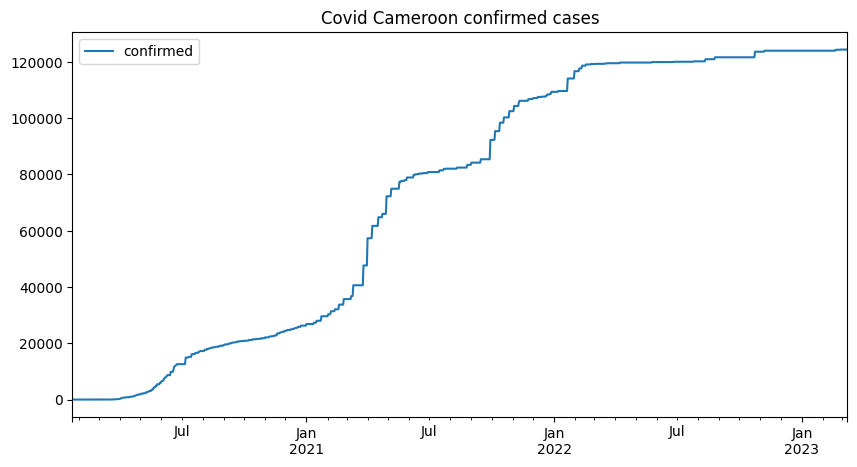

In [19]:
data_confirmed_country.plot(figsize = (10,5), title='Covid Cameroon confirmed cases')

In [20]:
len(data_confirmed_country)

1143

In [21]:
x = len(data_confirmed_country)-14
train = data_confirmed_country.iloc[:x]
test = data_confirmed_country.iloc[x:]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [24]:
#Arranger les données 
from keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 7 
n_features = 1 
train_generator = TimeseriesGenerator(train_scaled,train_scaled,length = seq_size,batch_size=1)

In [25]:
x_train,y_train = train_generator[10]
x_train,y_train

(array([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]),
 array([[0.]]))

In [27]:
test_generator = TimeseriesGenerator(test_scaled,test_scaled,length=seq_size,batch_size=1)

In [34]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation
model = Sequential()
model.add(LSTM(150,activation = "relu",return_sequences = True, input_shape=(seq_size,n_features)))
model.add(LSTM(150,activation = "relu"))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 150)            91200     
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 64)                9664      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 281,529
Trainable params: 281,529
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1122/1122 [==============================] - 7s 5ms/step - loss: 0.0030 - val_loss: 4.1723e-05
Epoch 2/10
1122/1122 [==============================] - 5s 4ms/step - loss: 0.0011 - val_loss: 7.0478e-09
Epoch 3/10
1122/1122 [==============================] - 5s 4ms/step - loss: 3.4791e-04 - val_loss: 2.3739e-04
Epoch 4/10
1122/1122 [==============================] - 5s 4ms/step - loss: 4.5770e-04 - val_loss: 6.0196e-05
Epoch 5/10
1122/1122 [==============================] - 5s 4ms/step - loss: 4.5548e-04 - val_loss: 1.6711e-04
Epoch 6/10
1122/1122 [==============================] - 5s 4ms/step - loss: 3.0906e-04 - val_loss: 3.0856e-04
Epoch 7/10
1122/1122 [==============================] - 5s 5ms/step - loss: 2.3870e-04 - val_loss: 3.2020e-04
Epoch 8/10
1122/1122 [==============================] - 5s 4ms/step - loss: 4.3631e-04 - val_loss: 1.1270e-04
Epoch 9/10
1122/1122 [==============================] - 5s 5ms/step - loss: 4.1216e-04 - val_loss: 7.5755e-05
Epoch 10/10
1122/1

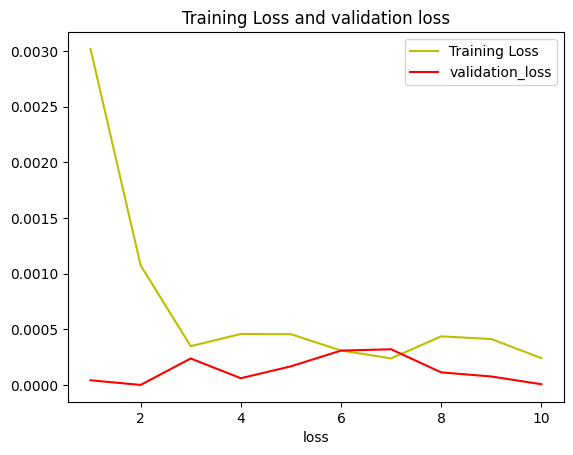

In [46]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(loss)+1)


plt.plot(epochs,loss,'y', label='Training Loss')
plt.plot(epochs,val_loss,'r',label="validation_loss")
plt.title('Training Loss and validation loss')
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend()

plt.show()

In [48]:
prediction = []
current_batch = train_scaled[-seq_size:] #derniers point du train
current_batch = current_batch.reshape(1,seq_size,n_features)

In [51]:
#predire les 7 prochains jours
future = 7
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [52]:
rescaled_prediction = scaler.inverse_transform(prediction)
rescaled_prediction

array([[124528.4399147 ],
       [124601.24092484],
       [124683.48294544],
       [124775.6106081 ],
       [124845.6104393 ],
       [124923.08008099],
       [125006.40403843],
       [125096.96066952],
       [125176.7423954 ],
       [125257.4874897 ],
       [125338.21776295],
       [125417.71788883],
       [125497.92942524],
       [125578.17060375],
       [125657.93750858],
       [125736.59283447],
       [125815.07030773],
       [125893.20689678],
       [125970.94331741],
       [126048.39813805],
       [126125.45279026]])

In [65]:
#creer les dates qui vont recevoir les predicitions
time_series_array = test.index
for k in range(0,future):
    time_series_array = time_series_array.append(time_series_array[-1:]+pd.DateOffset(1))

In [66]:
df_forecast = pd.DataFrame(columns = ["actual_confirmed","predicted"],index=time_series_array)

In [59]:
data_confirmed_country.tail(10)

,confirmed
2023-02-28,124392
2023-03-01,124392
2023-03-02,124392
2023-03-03,124392
2023-03-04,124392
2023-03-05,124392
2023-03-06,124392
2023-03-07,124392
2023-03-08,124392
2023-03-09,124392


In [67]:
df_forecast.loc[:,"predicted"]=rescaled_prediction[:,0]
df_forecast.loc[:,"actual_confirmed"]=test["confirmed"]


In [68]:
df_forecast

,actual_confirmed,predicted
2023-02-24,124328.0,124528.439915
2023-02-25,124328.0,124601.240925
2023-02-26,124328.0,124683.482945
2023-02-27,124392.0,124775.610608
2023-02-28,124392.0,124845.610439
2023-03-01,124392.0,124923.080081
2023-03-02,124392.0,125006.404038
2023-03-03,124392.0,125096.96067
2023-03-04,124392.0,125176.742395
2023-03-05,124392.0,125257.48749
